# Homework 3: Particles Diffusion physics


## First look at the problem

### Introduction to diffusion

We are going to look at the concept of [diffusion](https://en.wikipedia.org/wiki/Diffusion) as a random process where the probability distribution (PDF) of particles positions is following the dynamic of the diffusion equation in one dimension:

\begin{equation}
\frac{\partial P(x,t)}{\partial t} = K\frac{\partial^2 P(x,t)}{\partial x^2}
\end{equation}

where $K$ is the diffusion constant. $P(x,t)$ satisfies

\begin{equation}
\int_{-\infty}^{\infty}P(x,t) = 1
\end{equation}

as normalization condition

Actually we can introduce a more general equation where the diffusivity is not constant and $d$ is the space dimensionality in the isotropic case:

\begin{equation}
\frac{\partial P(r,t)}{\partial t} = \frac{1}{r^{d-1}}\frac{\partial}{\partial r}\left(r^{d-1}K(r)\frac{\partial P(r,t)}{\partial r}\right)
\end{equation}

where $K(r)$ is the diffusivity and $r=\sqrt{\sum_{i=1}^d x_i^2}$ is the norm of the position vector $\mathbf{r}=\left(\begin{matrix}
  x_1  \\
  x_2  \\
  \vdots  \\
  x_d
 \end{matrix}\right)$. This time $P(r,t)$ satisfies
 
\begin{equation}
\int_{0}^{\infty}r^{d-1}P(r,t) = 1.
\end{equation}

In the following we are going to look at the $d=1$ for the sake of simplicity.

### Power law diffusity: an interesting dynamics

A diffusivity that is dependent of the position norm generates a very rich physics. We are going to consider the case of a power law diffusity:

\begin{equation}
K(r) = Dr^\alpha, \,\,\, 0<\alpha<2
\end{equation}

This diffusivity induces a long-time evolution $t\rightarrow\infty$

\begin{equation}
\langle r^2(t)\rangle \sim g\left(Dt\right)^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{3}{\gamma}\right)}{\Gamma\left(\frac{1}{\gamma}\right)}
\end{equation}

where $\Gamma(x)$ is the [gamma function](https://en.wikipedia.org/wiki/Gamma_function). $\gamma$ is a function of $\alpha$ and finding the relationship between the 2 will part of the homework. The PDF has a stretched-exponential distribution

\begin{equation}
P(r,t) = \frac{1}{\sqrt{\langle r^2(t)\rangle}}\exp\left[-A\left(\frac{r}{\sqrt{\langle r^2(t)\rangle}}\right)^\gamma + B\right]
\end{equation}

with

\begin{eqnarray}
A&=&\left[\frac{\Gamma\left(\frac{3}{\gamma}\right)}{\Gamma\left(\frac{1}{\gamma}\right)}\right]^{\gamma/2}\\
B&=&\log\left[\gamma\frac{\Gamma\left(\frac{3}{\gamma}\right)^{1/2}}{\Gamma\left(\frac{1}{\gamma}\right)^{3/2}}\right]
\end{eqnarray}

Once again, those results assumes $d=1$. We cannot start particles at $x=0$ ($r=0$) because that implies that $K(r=0)=0$ at $t=0$ and the particles would never move as $\frac{\partial P(r,t)}{\partial t}=0$. We then need to start the particles at a small initial distance $r_0$. This initial condition produces an interesting short time diffusive behavior 

\begin{equation}
\langle r^2(t)\rangle -r_0^2\sim 2K(r_0)t
\end{equation}

as the particles disperse slowly at first from their original point. This period is lasting until the "takeoff time" $t_{t_0}$ when $K(r_0)t_{t_0}\sim r_0^2$ or

\begin{equation}
t_{to} \sim \frac{r_0^{2-\alpha}}{D}
\end{equation}

### Solving the diffusion equation using a Monte Carlo method

The above diffusion equation has an equivalent [Ito](https://en.wikipedia.org/wiki/It%C3%B4_calculus) stochastic differential equation

\begin{equation}
dx = \sqrt{2K(r)}dW
\end{equation}

with $r=|x|$ and $W$ is a [Wiener process](https://en.wikipedia.org/wiki/Wiener_process) or Brownian motion. We can numerically integrate the stochastic equations using the [Euler-Maruyama](https://en.wikipedia.org/wiki/Euler%E2%80%93Maruyama_method) scheme:

\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K(r(T_{i-1}))\Delta T}N_{T}
\end{equation}
where $\Delta T$ is a discretized time increment and $N_{T}$ is a standard normal random variable.

We need to be able to explore different time scales regimes. At the initial moments of the simulation, we require the time increments $\Delta T\ll t_{t_0}$ when $T\ll t_{t_0}$ to capture the short times physics but we need $T\gg t_{t_0}$ later on to observe the long time dynamics. Additionally, at every point in time we need $\Delta T\ll T$. Because it would take too many steps to reach the long time regime with a very small time increment, we are going to consider variable time increments.

Let's consider $N$ time steps exponentially distributed:
\begin{equation}
T(n) = a \exp\left(b(n-1)\right)
\end{equation}
We need $T(1)\ll t_{to}$ and $T(N)\gg t_{to}$. We arbitrary going to fix 

\begin{eqnarray}
T(1)&=&10^{-5}t_{to}\\
T(N)&=&10^{5}t_{to}
\end{eqnarray}

Therefore we have 

\begin{equation}
T(1) = a = 10^{-5}t_{to}
\end{equation}

and

\begin{equation}
T(N) = 10^{-5}t_{to}\exp\left(b(N-1)\right) = 10^{5}t_{to}
\end{equation}
or
\begin{equation}
b = \frac{10\log(10)}{N-1}
\end{equation}

Then we can obtain $\Delta T(n) = T(n) - T(n-1)$

## Simulating to create our data

We have exposed quite some physics to diggest! Let's try to study this physics step by step. First, to simplify the problem, we are going to fix $r_0=D=1$. Those are completely acceptable arbitrary constants. This implies that $t_{to}=\frac{r_0^{2-\alpha}}{D}=1$.

### Fixing the times

Let's create all the $T(n)$. We are going to fix $N=1000$ We have

\begin{equation}
T(n) = a \exp\left(b(n-1)\right)
\end{equation}

with $a = 10^{-5}$  and $b = \frac{10\log(10)}{N-1}$. Use the functions [`exp`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.exp.html), [`log`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.log.html) and [`arange`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.arange.html) from [numpy](http://www.numpy.org/) to create a numpy array of $N$ entries representing the times 

In [75]:
import numpy as np

# TODO: create the time array
N = 1000
a = 1e-5
b = 15. * np.log(10.) / (N - 1)
T = a * np.exp(b * (np.arange(1, N+1) - 1))

T

array([  1.00000000e-05,   1.03517796e-05,   1.07159340e-05,
         1.10928986e-05,   1.14831241e-05,   1.18870770e-05,
         1.23052400e-05,   1.27381132e-05,   1.31862140e-05,
         1.36500781e-05,   1.41302599e-05,   1.46273336e-05,
         1.51418933e-05,   1.56745541e-05,   1.62259529e-05,
         1.67967487e-05,   1.73876240e-05,   1.79992851e-05,
         1.86324631e-05,   1.92879151e-05,   1.99664245e-05,
         2.06688025e-05,   2.13958887e-05,   2.21485523e-05,
         2.29276931e-05,   2.37342425e-05,   2.45691646e-05,
         2.54334576e-05,   2.63281547e-05,   2.72543253e-05,
         2.82130768e-05,   2.92055551e-05,   3.02329468e-05,
         3.12964801e-05,   3.23974263e-05,   3.35371015e-05,
         3.47168682e-05,   3.59381366e-05,   3.72023668e-05,
         3.85110700e-05,   3.98658107e-05,   4.12682085e-05,
         4.27199397e-05,   4.42227398e-05,   4.57784054e-05,
         4.73887961e-05,   4.90558371e-05,   5.07815211e-05,
         5.25679112e-05,

We are adding $t=0$ to the `T` array

In [76]:
T = np.insert(T, 0, 0)
T

array([  0.00000000e+00,   1.00000000e-05,   1.03517796e-05, ...,
         9.33189772e+09,   9.66017480e+09,   1.00000000e+10])

Let's create now the $\Delta T(n)$. We can do that taking the [difference between arrays as numpy is vectorized](https://stackoverflow.com/questions/21516089/difference-between-two-numpy-arrays-in-python). Remember that a numpy array can be indexed such that `T[1:]` represents the $T$ array from the second element to the last and that `T[:-1]` represents the $T$ array from the first element to the one before last.

In [77]:
# TODO: create the array of deltaT
deltaTs = T[1:] - T[:-1]
deltaTs

array([  1.00000000e-05,   3.51779556e-07,   3.64154442e-07,
         3.76964651e-07,   3.90225496e-07,   4.03952832e-07,
         4.18163066e-07,   4.32873188e-07,   4.48100782e-07,
         4.63864052e-07,   4.80181841e-07,   4.97073656e-07,
         5.14559691e-07,   5.32660849e-07,   5.51398769e-07,
         5.70795850e-07,   5.90875281e-07,   6.11661066e-07,
         6.33178051e-07,   6.55451961e-07,   6.78509421e-07,
         7.02377995e-07,   7.27086217e-07,   7.52663624e-07,
         7.79140791e-07,   8.06549372e-07,   8.34922130e-07,
         8.64292983e-07,   8.94697043e-07,   9.26170656e-07,
         9.58751447e-07,   9.92478362e-07,   1.02739172e-06,
         1.06353326e-06,   1.10094619e-06,   1.13967522e-06,
         1.17976667e-06,   1.22126845e-06,   1.26423018e-06,
         1.30870321e-06,   1.35474071e-06,   1.40239772e-06,
         1.45173121e-06,   1.50280014e-06,   1.55566558e-06,
         1.61039071e-06,   1.66704097e-06,   1.72568406e-06,
         1.78639010e-06,

### Defining the difusivity

We are now going to write a function that takes argument $r$ and $\alpha$ to generate the difusivity $K(r)=Dr^\alpha=r^\alpha$. You can use the function [`power`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.power.html).

In [4]:
# TODO: write a function that return the diffusivity
def diffusivity(r, alpha):
    return np.power(r, alpha)    


### Defining a time update

We are going to define the time update:

\begin{equation}
x(T_i) = x(T_{i-1}) + \sqrt{2K(r(T_{i-1}))\Delta T}N_{T}
\end{equation}

To do so, we are going to write a function that take $S$ particle positions at a point in time, a time increment $\Delta T$ and an exponent $\alpha$ to return the new positions at the next time step. To create the $S$ samples of a normal variable, you can use [`numpy.random.normal`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.normal.html). Remember that $N_{T}$ is a normal variable with mean 0 and unit variance. Use the `diffusivity` function you wrote earlier, [`numpy.sqrt`](https://www.google.com/search?q=numpy+sart&oq=numpy+sart&aqs=chrome..69i57j0l5.2967j0j4&sourceid=chrome&ie=UTF-8#q=numpy+sqrt) and [`numpy.absolute`](https://docs.scipy.org/doc/numpy/reference/generated/numpy.absolute.html).

In [5]:
# TODO: write a function that update the particles positions
def update_positions(positions, time_step, alpha):
    return positions + np.sqrt(2 * diffusivity(np.absolute(positions), alpha) * time_step) * np.random.normal(size=len(positions)) 



### Initializing the simulation

Remember that we are working at $d=1$. We need to initialize the particles positions such that $r_0=\Vert\mathbf{r_0}\Vert=1$. We are going to choose between $\mathbf{r_0}= \hat{\mathbf{x}}$ and $\mathbf{r_0}= -\hat{\mathbf{x}}$ at random such that $\langle\mathbf{r_0}\rangle=0$. Here $\hat{\mathbf{x}}$ is the unit vector along the $x$-axis. Use the function [`numpy.random.choice`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.choice.html) to initialize the positions of the particles. Because we need enough particles to average over, we are choosing $L=10000$ (`num_particles`) to be the number of particles (actually you can try more if you want!).

In [78]:
# TODO: initialize the position of the particles along the x-axis
num_particles = 1000
r0 = np.random.choice([1.,-1.], num_particles)
r0

array([ 1.,  1., -1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1.,  1.,  1.,
        1., -1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,  1., -1.,
       -1.,  1.,  1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,  1.,
       -1.,  1.,  1.,  1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1.,
       -1., -1., -1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1.,  1.,
       -1., -1.,  1.,  1., -1.,  1.,  1., -1., -1.,  1.,  1.,  1., -1.,
        1., -1.,  1., -1., -1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,
        1.,  1., -1.,  1., -1.,  1., -1., -1., -1.,  1., -1., -1.,  1.,
       -1., -1., -1., -1., -1., -1.,  1.,  1., -1., -1.,  1., -1.,  1.,
        1., -1., -1., -1., -1.,  1., -1.,  1., -1., -1.,  1.,  1.,  1.,
        1.,  1.,  1., -1., -1., -1., -1.,  1., -1.,  1., -1.,  1.,  1.,
        1.,  1., -1.,  1.,  1., -1.,  1.,  1., -1., -1., -1., -1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1., -1., -1., -1., -1., -1., -1.,
        1.,  1., -1., -1.,  1.,  1., -1., -1.,  1.,  1., -1., -1

We are now initializing a dataframe to zero where each row represents the position of one particle at different point in time and each column represents the positions of all 10000 particles at a specific point in time. Including $t=0$ we have 1001 different points in time. We set the first column to $r_0$

In [79]:
import pandas as pd

diffusion_df = pd.DataFrame(index=np.arange(num_particles),
                            columns=np.arange(N + 1))
diffusion_df[0] = r0

diffusion_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



### Running the simulation

Now that our particles are set at $t=0$, we can start the diffution process by updating the position of each particle until they reach the final time using the `update_positions` function. Write a function with a `for loop` that uses a column "T_i" to write the column "T_i+1". This function takes as argument a dataframe, an exponent $\alpha$ and a list of $\Delta T$ and return a filled dataframe. Make a copy of the dataframe inside the function to not erase the initial `diffusion_df` dataframe.  

In [91]:
# TODO: write a function that computes the positions of all the particles at each time

        
def run_simulation(df, alpha, deltaTs, T, num_particles, max_time_step):
    df_copy = df.copy()
    present_time = np.zeros(num_particles)
    present_pos = df.iloc[:,0]
    def update(col):
            cond2 = index_present == col.name
            col_copy = col.copy()
            col_copy[cond2] = (past_pos[cond2] + (T[col.name] - past_time[cond2]) * 
                                           (present_pos[cond2] -  past_pos[cond2]) / 
                                           (present_time[cond2] -  past_time[cond2]))
            return col_copy
    for time in range(max_time_step):
        print(time,end="\r")
        past_time = present_time.copy()
        past_pos = present_pos.copy()
        limit = (np.power(present_pos, 2) / diffusivity(np.absolute(present_pos), alpha))
        index_past = np.digitize(past_time, T) - 1
        time_step = np.minimum(deltaTs[index_past], limit)
        present_time = past_time + time_step      
        present_pos = update_positions(past_pos, time_step, alpha)
        
        index_present = np.digitize(present_time, T) - 1
        index_diff = index_present - index_past
        cond = index_diff != 0
#         def update(row):
#             row[index_present[row.name]] = (past_pos[row.name] + (T[index_present[row.name]] - past_time[row.name]) * 
#                                            (present_pos[row.name] -  past_pos[row.name]) / 
#                                            (present_time[row.name] -  past_time[row.name]))
#             return row
        


        if cond.any(): 
            df_copy.loc[:,np.unique(index_present[cond])] = df_copy.loc[:,np.unique(index_present[cond])].apply(update)
        
        
    return df_copy
  
# As an example
alpha = 2. / 3.
diffusion_filled_df = run_simulation(diffusion_df, alpha, deltaTs, T, num_particles, 10000)
# diffusion_filled_df.to_csv("")
diffusion_filled_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,1.0,0.994345,0.993684,0.994987,0.995504,0.996102,0.994460,0.993130,0.992297,0.990380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,0.993172,0.993600,0.993632,0.993681,0.993262,0.992362,0.992370,0.993692,0.992945,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1.0,-0.998211,-0.998463,-0.998174,-0.997673,-0.998016,-0.998273,-0.999618,-0.998618,-0.997094,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,0.994647,0.994890,0.995187,0.996553,0.996254,0.995956,0.996684,0.997536,0.997451,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,1.005984,1.006751,1.007499,1.008862,1.010538,1.010158,1.009071,1.008137,1.007564,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1.0,1.003232,1.002986,1.003209,1.003713,1.003268,1.002719,1.002823,1.001637,1.002110,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,1.0,0.993899,0.994705,0.994657,0.995705,0.995396,0.997065,0.997843,0.997311,0.997966,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,1.0,1.002185,1.001199,0.999444,0.999249,1.000642,0.999347,0.998256,0.997936,0.999157,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,-1.0,-0.998209,-0.997319,-0.997085,-0.998329,-0.998558,-0.996877,-0.997165,-0.997627,-0.998777,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,-1.0,-0.998480,-0.998619,-0.999871,-1.000014,-0.998711,-0.999333,-0.998828,-1.000127,-0.999753,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [72]:
t = np.arange(10)
index = np.array([2,5,2,7,2])
cond = np.array([False, False, True, True, False])
cond.any()

True


## Studying the data

Up to now, everything was a pretext to create some data to study. Let's try to understand a bit more the physics of those particles. 

### The dispersion

We are going to start by computing the dispersion $\langle \Vert \mathbf{r}(t) - \mathbf{r}_0\Vert^2\rangle$ at different points in time. Note that for long time $\langle \Vert \mathbf{r}(t) - \mathbf{r}_0\Vert^2\rangle\sim \langle r^2(t)\rangle$. Let's create a dataframe `dispersion_df`:

- We take `diffusion_filled_df` and substract every columns by its first using the [`sub`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sub.html) function with `axis=0`
- We take the square the elements of the resulting dataframe using the [`pow`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.pow.html) function

In [92]:
# TODO: substract every columns of diffusion_filled_df by its first and take the square of every elements
dispersion_df = diffusion_filled_df.sub(diffusion_filled_df[0] ,axis=0).pow(2)
dispersion_df

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,1000
0,0,3.19819e-05,3.98972e-05,2.51332e-05,2.02178e-05,1.51961e-05,3.06878e-05,4.71951e-05,5.9341e-05,9.2548e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,4.66194e-05,4.09553e-05,4.05566e-05,3.99293e-05,4.53997e-05,5.83374e-05,5.82165e-05,3.97873e-05,4.97783e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3.20139e-06,2.36291e-06,3.33528e-06,5.4163e-06,3.9375e-06,2.98132e-06,1.45617e-07,1.91006e-06,8.44731e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,2.86545e-05,2.61121e-05,2.31629e-05,1.18838e-05,1.40343e-05,1.63572e-05,1.09982e-05,6.07006e-06,6.49513e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3.5805e-05,4.55765e-05,5.62296e-05,7.85332e-05,0.000111056,0.000103192,8.22792e-05,6.62133e-05,5.72174e-05,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0,1.04441e-05,8.91492e-06,1.02997e-05,1.37837e-05,1.06828e-05,7.39203e-06,7.97059e-06,2.67979e-06,4.45299e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0,3.72272e-05,2.80377e-05,2.85511e-05,1.84483e-05,2.11984e-05,8.61183e-06,4.65303e-06,7.23016e-06,4.13568e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,0,4.77539e-06,1.43766e-06,3.09074e-07,5.63467e-07,4.11597e-07,4.26421e-07,3.04146e-06,4.2603e-06,7.11169e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0,3.20851e-06,7.18992e-06,8.49966e-06,2.79156e-06,2.07902e-06,9.75276e-06,8.03583e-06,5.63116e-06,1.49662e-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,2.30946e-06,1.90625e-06,1.65262e-08,1.97737e-10,1.6625e-06,4.44929e-07,1.37247e-06,1.60925e-08,6.08124e-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We now take the mean ([`mean`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)) and standard deviation ([`std`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)) of every column. To apply two functions at once on a column you can use the apply function such that:

```
df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
```

In [93]:
# TODO: compute the mean and standard deviation of every column of the dispersion_df dataframe
dispersion_avg = dispersion_df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()
dispersion_avg

,mean,std
0,0.000000e+00,0.000000
1,2.029312e-05,0.000030
2,2.059799e-05,0.000030
3,2.134992e-05,0.000031
4,2.252699e-05,0.000032
5,2.369993e-05,0.000034
6,2.472120e-05,0.000036
7,2.601503e-05,0.000037
8,2.656478e-05,0.000038
9,2.745429e-05,0.000039


### The confidence interval

Because we computed the sample standard deviation, we can estimate the [confidence interval](https://en.wikipedia.org/wiki/Confidence_interval) of the mean. Under the assumption that $\Vert \mathbf{r}(t) - \mathbf{r}_0\Vert^2$ is normal distributed (which is not true!), it is a very good approximation to estimate the confidence interval such that

\begin{equation}
\left(\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle - c\frac{S}{\sqrt{L}},\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle + c\frac{S}{\sqrt{L}}\right)
\end{equation}

where $S$ is the estmate of the standard deviation, $L$ is the number of samples used (here the number of particles) and $c$ is a parameter we chose depending on the on confidence level on the average we require. For example $c\simeq1.96$ gives a 95% confidence level for this confidence interval. 

### Plotting the dispersion

We are now going to plot the dispersion with matplotlib:

>- Use the [`errorbar`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.errorbar.html) function with the $T$ array on the x-axis and `dispersion_avg["mean"]` on the y-axis. Use `dispersion_avg["std"]` divided by the square-root of the number of particles for the `yerr` argument (in principle it should almost be negligeable). 
- Set the line width to 3 using the `lw` argument
- Set the color of the line to blue by using the `color` argument
- Set the label of the curve to "Dispersion"
- Set the size of the figure to `[10, 8]` using `plt.rcParams["figure.figsize"] = [10, 8]`
- Set the x and y tick label sizes to 20 using `plt.rc('xtick', labelsize=20)`
- Set x label to "Time" with font size 25 using `plt.xlabel("Time", fontsize=25)` and the y label to "$\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle$" with font size 25. You can write math instead of text by using `r"$some math$"`.
- Set the x and y limits by using `plt.xlim(0,1000)` to the min and max of `T` and the dispersion 
- Set the x and y scales to loglog plot using `plt.xscale("log", nonposx='clip')`.
- Write out the label of the curve using `plt.legend()` with font size set to 20.

Note: Everything appearing linear on a loglog plot is a power law with the exponent as the slope 

\begin{eqnarray}
y = ax^b \Leftrightarrow \log y = \log a + b\log x \Leftrightarrow Y = BX + A 
\end{eqnarray}

where $Y=\log y$, $X=\log x$, $B=b$ and $A=\log a$

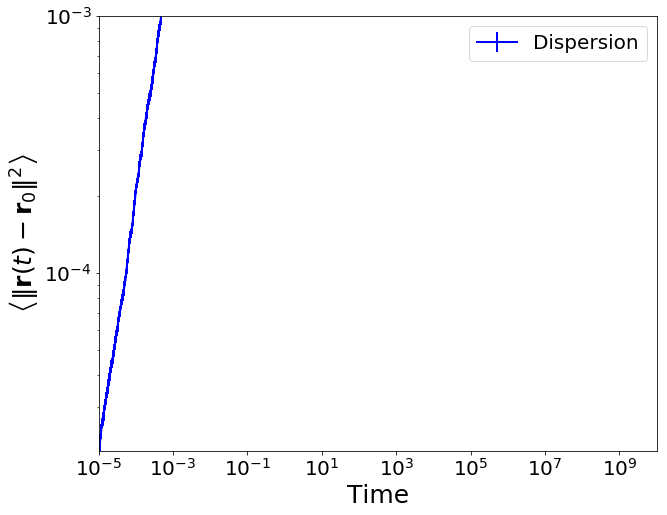

In [94]:
%matplotlib inline 
import matplotlib.pyplot as plt

# TODO: Set the size of the figure to [10, 8]
fig_size = [10, 8]
plt.rcParams["figure.figsize"] = fig_size

# TODO: Set the x and y tick label sizes to 20
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

# TODO: Set the x and y scales to loglog plot
plt.xscale("log", nonposx='clip')
plt.yscale("log", nonposy='clip')

# TODO: plot
plt.errorbar(T, dispersion_avg["mean"],
             yerr=dispersion_avg["std"] / np.sqrt(num_particles), 
             lw=2, color="b", label="Dispersion")

# TODO: Set the x and y limits
plt.xlim(min(T),max(T))
plt.ylim(min(dispersion_avg["mean"]), max(dispersion_avg["mean"]))

# TODO: Set the x and y labels
plt.xlabel("Time", fontsize=25)
plt.ylabel(r"$\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle$", fontsize=25)

# TODO: write the legend
plt.legend(fontsize=20)

### The diffusive regime

You remember that for short time

\begin{equation}
\langle \left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle\sim 2K(r_0)t = 2r_0^\alpha t=2t
\end{equation}

with $r_0=1$. Now that we have shown that the error bar is negligeable, we are going to drop the error bars (never do that in a scientific article though! We are doing this for simplicity here). 

- Use the [plt.loglog](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.loglog.html) to plot `dispersion_avg["mean"]/T` versus `T`. 
- Add a horizontal red line using plt.axhline() at 2 corresponding to $2K(r_0)t / t$
- Name your axis, add the legend

Note: You would notice that $\langle \left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle\sim 2K(r_0)t$ is a very good asymptotic behavior and that it lasts until $t\approx t_{to} =1$

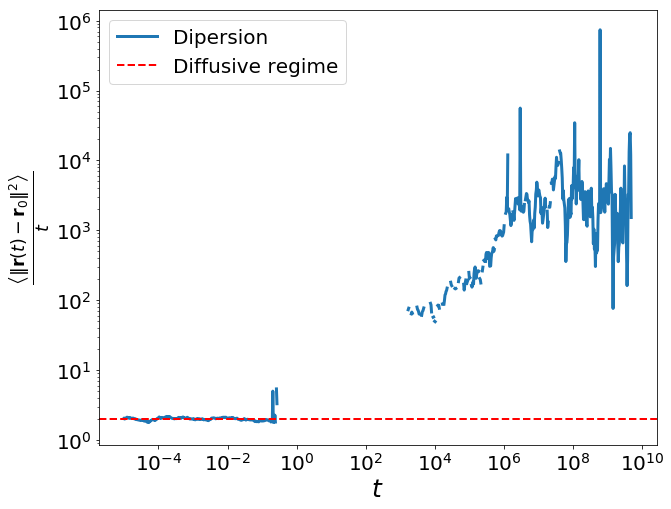

In [95]:
# TODO: plot dispersion_avg["mean"]/T versus T
plt.loglog(T, dispersion_avg["mean"]/T, lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\frac{\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle}{t}$", fontsize=25)

# TODO: add horizontal line for the diffusive regime
plt.axhline(2, color="r", lw=2,  ls="--", label="Diffusive regime")

# TODO: add the legend
plt.legend(fontsize=20)

### The long time behavior

After a long time the diffusive regime is replaced by 

\begin{equation}
\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle \sim g t^{2/\gamma}, \,\,\,\, g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{3}{\gamma}\right)}{\Gamma\left(\frac{1}{\gamma}\right)}
\end{equation}

with $\gamma$ being a linear function of $\alpha$. Let's try to find $\gamma$. Use the `plt.loglog` function to plot `dispersion_avg["mean"]/np.power(T, 2/gamma)` versus `T` such that the long time regime appears constant. recompute the dipersion for few different $\alpha$ and see how it influence the value of $\gamma$.

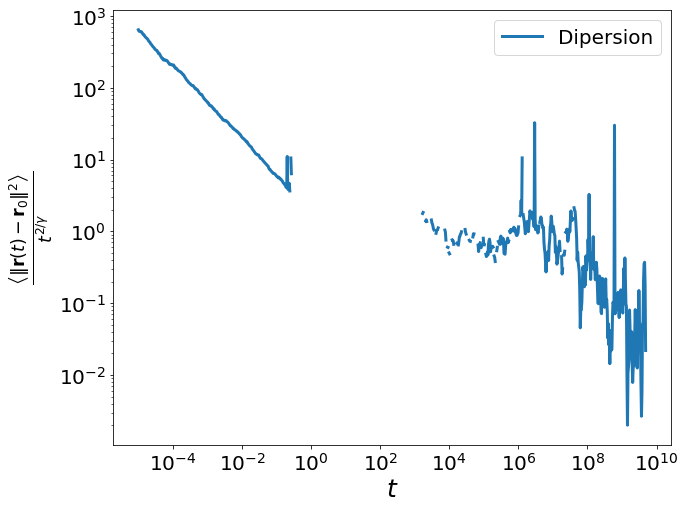

In [96]:
gamma = 4/3

# TODO: plot dispersion_avg["mean"]/np.power(T, 2/gamma) versus T
plt.loglog(T, dispersion_avg["mean"]/np.power(T, 2/gamma), lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\frac{\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle}{t^{2/\gamma}}$", fontsize=25)

# TODO: add the legend
plt.legend(fontsize=20)

In [262]:
# TODO: recompute the dispersion for another value of alpha
alpha = 1. / 6.

diffusion_filled_df = run_simulation(diffusion_df, alpha, deltaTs)
dispersion_df = diffusion_filled_df.sub(diffusion_filled_df["T_0"] ,axis=0).pow(2)
dispersion_avg = dispersion_df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()

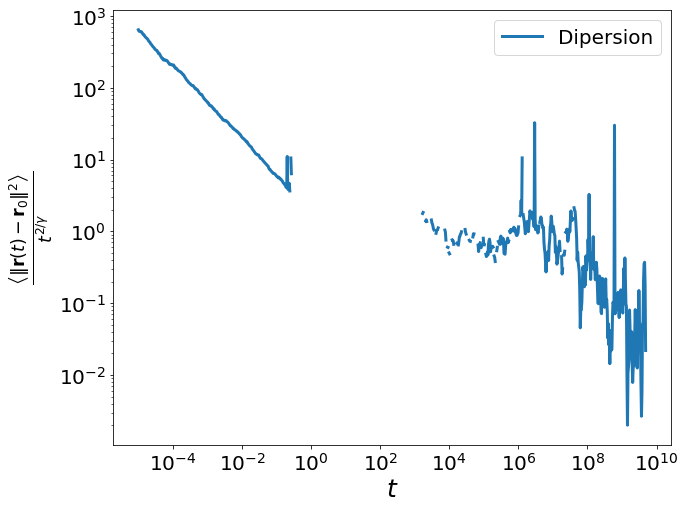

In [97]:
# TODO: find the gamma that make the plot flat
gamma = 4/3

# TODO: plot dispersion_avg["mean"]/np.power(T, 2/gamma) versus T
plt.loglog(T, dispersion_avg["mean"]/np.power(T, 2/gamma), lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\frac{\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle}{t^{2/\gamma}}$", fontsize=25)

# TODO: add the legend
plt.legend(fontsize=20)

To find the relationship between $\alpha$ and $\gamma$, we know that

\begin{equation}
\gamma = A\alpha + B
\end{equation}

We found 2 sets $(\alpha_1, \gamma_1)$ and $(\alpha_2, \gamma_2)$ that satisfy the relationship. We can now solve for $A$ and $B$. What are $A$ and $B$?

In [56]:
# TODO: write what are A and B?
A = -1
B = 2

Now we can find $g=\frac{\gamma^{4/\gamma}\Gamma\left(\frac{3}{\gamma}\right)}{\Gamma\left(\frac{1}{\gamma}\right)}$. Use the [`scipy.special.gamma`](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.special.gamma.html) function to compute the $g$ coefficient: 

In [98]:
from scipy.special import gamma as G

# TODO: write a function that return the coefficient g
def coefficient(gamma, d=1):
    return np.power(gamma, 4./gamma) * G((d+2)/gamma) / G(d/gamma)

def coefficient2(gamma, d=0):
    return np.power(gamma*(d+2-gamma), 2./gamma) 

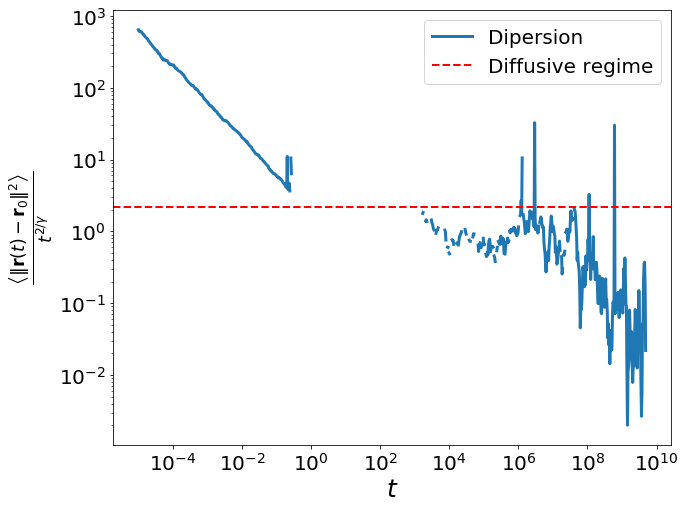

In [99]:
gamma = 2 - alpha

# TODO: plot dispersion_avg["mean"]/np.power(T, 2/gamma) versus T
plt.loglog(T, dispersion_avg["mean"]/np.power(T, 2/gamma), lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\frac{\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle}{t^{2/\gamma}}$", fontsize=25)

# TODO: add horizontal line for the diffusive regime
plt.axhline(coefficient(gamma), color="r", lw=2,  ls="--", label="Diffusive regime")

# TODO: add the legend
plt.legend(fontsize=20)

In [324]:
N = 1000
a = 1e-3
b = 8. * np.log(10.) / (N - 1)
T2 = a * np.exp(b * (np.arange(1, N+1) - 1))

T2 = np.power((np.arange(1001))/100, 5)

# T2 = np.insert(T2, 0, 0)
deltaTs2 = (T2[1:] - T2[:-1]) * 0.01
T2

array([  0.00000000e+00,   1.00000000e-10,   3.20000000e-09, ...,
         9.90039920e+04,   9.95009990e+04,   1.00000000e+05])

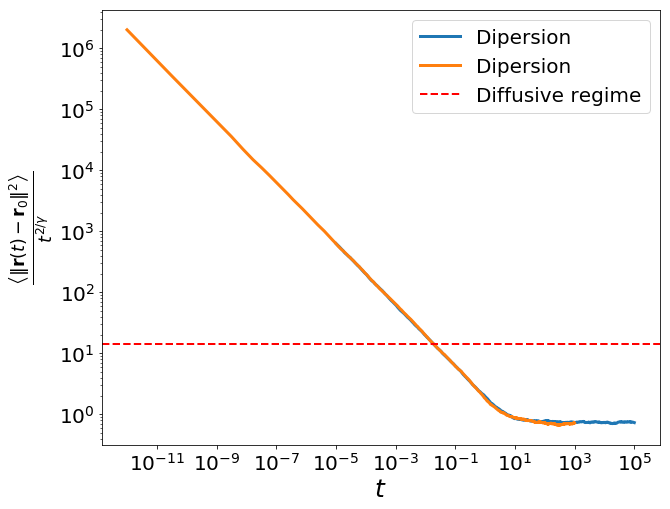

In [486]:
alpha = 2. / 3.

diffusion_filled_df = run_simulation(diffusion_df, alpha, deltaTs)
dispersion_df = diffusion_filled_df.sub(diffusion_filled_df["T_0"] ,axis=0).pow(2)
dispersion_avg = dispersion_df.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()

# diffusion_filled_df2 = run_simulation(diffusion_df, alpha, deltaTs2)
# dispersion_df2 = diffusion_filled_df2.sub(diffusion_filled_df2["T_0"] ,axis=0).pow(2)
# dispersion_avg2 = dispersion_df2.apply(lambda r: pd.Series({'mean': r.mean(), 'std': r.std()})).transpose()

gamma = 2 - alpha

# TODO: plot dispersion_avg["mean"]/np.power(T, 2/gamma) versus T
plt.loglog(T, dispersion_avg["mean"]/np.power(T, 2/gamma), lw=3, label="Dipersion")

plt.loglog(T2 * 0.01, dispersion_avg2["mean"]/np.power(T2 * 0.01, 2/gamma), lw=3, label="Dipersion")
plt.xlabel(r"$t$", fontsize=25)
plt.ylabel(r"$\frac{\left\langle\Vert\mathbf{r}(t) - \mathbf{r}_0\Vert^2\right\rangle}{t^{2/\gamma}}$", fontsize=25)
gamma = (2 - alpha) /2
# TODO: add horizontal line for the diffusive regime
plt.axhline(coefficient(gamma), color="r", lw=2,  ls="--", label="Diffusive regime")

# TODO: add the legend
plt.legend(fontsize=20)

In [475]:
4/3

1.3333333333333333

In [332]:
def A(gamma, d):
    return np.power(G((d+2)/gamma) / G(d/gamma),gamma/2)

def B(gamma, d):
    return np.log(gamma * np.power(G((d+2)/gamma), d/2.) / np.power(G(d/gamma), (d+2)/2))

def coefficient(gamma, d=3):
    return np.power(gamma, 4./gamma) * G((d+2)/gamma) / G(d/gamma)

B(1/3, 3)

10.176712228576786

In [343]:
dispersion_df["cut"], bins = pd.qcut(dispersion_df["T_1000"].abs(),20, retbins=True,)
deltaR = bins[1:] - bins[:-1]
pdf = dispersion_df.groupby("cut")["T_1000"].count() / num_particles / deltaR

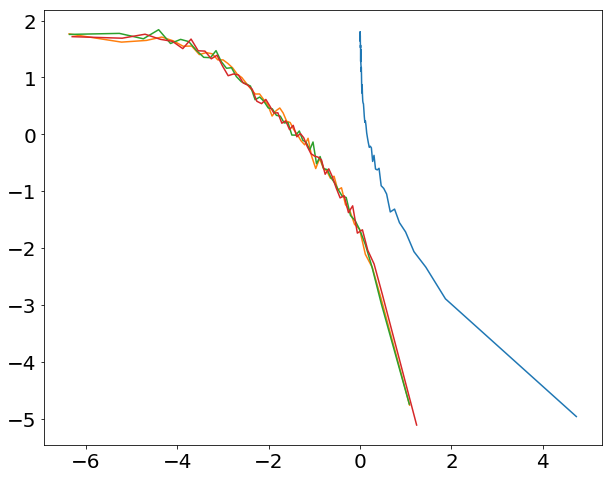

In [500]:
col = "T_1000"
alpha = 2. / 3.
gamma = 2 - alpha
# gamma = (2 - alpha) /2 

diffusion_filled_df["cut"], bins = pd.qcut(diffusion_filled_df[col].abs(),50, retbins=True)
deltaR = bins[1:] - bins[:-1]
pdf = diffusion_filled_df.groupby("cut")[col].count() / num_particles / deltaR
r = (bins[1:] + bins[:-1]) / 2
r_t = dispersion_avg.loc[col, "mean"]

rtt = coefficient(gamma, 1) *np.power(T[-1],2/gamma)
plt.plot(np.power(r /np.sqrt(rtt), gamma), np.log(pdf *np.sqrt(rtt)))

col = "T_900"

diffusion_filled_df["cut"], bins = pd.qcut(diffusion_filled_df[col].abs(),50, retbins=True)
deltaR = bins[1:] - bins[:-1]
pdf = diffusion_filled_df.groupby("cut")[col].count() / num_particles / deltaR
r = (bins[1:] + bins[:-1]) / 2
r_t = dispersion_avg.loc[col, "mean"]
rtt = coefficient(gamma, 1) * np.power(T[900],2/gamma)
plt.plot(np.power(r / np.sqrt(rtt), gamma), np.log(pdf * np.sqrt(rtt)))

col = "T_800"

diffusion_filled_df["cut"], bins = pd.qcut(diffusion_filled_df[col].abs(),50, retbins=True)
deltaR = bins[1:] - bins[:-1]
pdf = diffusion_filled_df.groupby("cut")[col].count() / num_particles / deltaR
r = (bins[1:] + bins[:-1]) / 2
r_t = dispersion_avg.loc[col, "mean"]
rtt = coefficient(gamma, 1) * np.power(T[800],2/gamma)
plt.plot(np.power(r / np.sqrt(rtt), gamma), np.log(pdf * np.sqrt(rtt)))

col = "T_700"

diffusion_filled_df["cut"], bins = pd.qcut(diffusion_filled_df[col].abs(),50, retbins=True)
deltaR = bins[1:] - bins[:-1]
pdf = diffusion_filled_df.groupby("cut")[col].count() / num_particles / deltaR
r = (bins[1:] + bins[:-1]) / 2
r_t = dispersion_avg.loc[col, "mean"]
rtt = coefficient(gamma, 1) *np.power(T[700],2/gamma)
plt.plot(np.power(r / np.sqrt(rtt), gamma), np.log(pdf * np.sqrt(rtt)))

# plt.xlim(0,3)

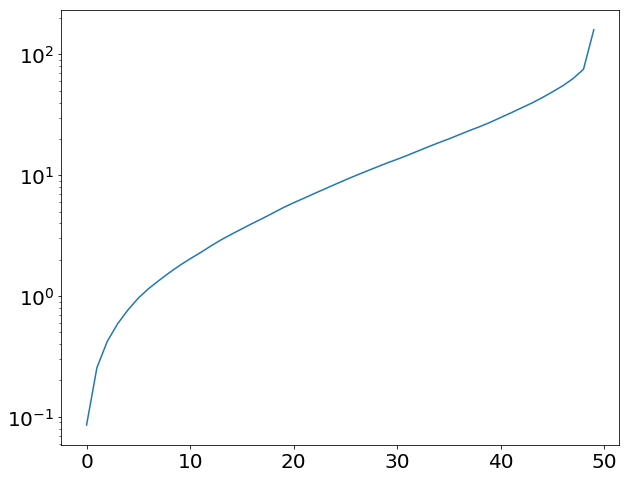

In [499]:
plt.semilogy(r)

In [386]:
alpha

0.5

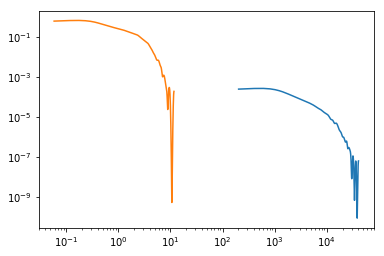

In [184]:
from scipy.stats import gaussian_kde
density = gaussian_kde(diffusion_filled_df["T_999"].abs())
xs = np.linspace(0,diffusion_filled_df["T_999"].abs().max(),200)
plt.loglog(xs,density(xs))

density = gaussian_kde(diffusion_filled_df["T_500"].abs())
xs = np.linspace(0,diffusion_filled_df["T_500"].abs().max(),200)
plt.plot(xs,density(xs))

In [323]:
diffusion_filled_df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999,T_1000
0,-1.0,-0.995471,-0.996021,-0.996292,-0.996487,-0.997089,-0.996648,-0.996072,-0.995781,-0.996129,...,1089.155719,1580.957788,791.903686,1035.271022,1421.843758,1343.170398,277.760235,563.616550,447.821441,436.949765
1,-1.0,-0.994448,-0.994934,-0.994547,-0.995372,-0.995166,-0.995344,-0.995401,-0.995193,-0.995955,...,-378.169811,-185.841780,-342.986531,-601.191162,-648.773576,-518.388577,-166.140661,-605.665355,-398.853899,-687.829245
2,1.0,1.009180,1.009533,1.009166,1.007901,1.008659,1.007051,1.008000,1.008230,1.008809,...,972.169141,449.891037,307.536226,338.238578,773.650734,945.914562,769.586947,374.755292,-129.117650,-397.903123
3,-1.0,-0.996612,-0.996651,-0.996489,-0.996762,-0.995670,-0.997051,-0.997729,-0.997261,-0.997799,...,329.530424,501.946528,515.102910,-100.596093,-239.949244,-389.894845,-457.119748,-222.585075,40.888626,-1.513976
4,1.0,0.996693,0.996509,0.996974,0.997398,0.997544,0.998405,0.999934,1.000307,1.000460,...,3228.325270,3070.073432,3369.173345,4012.698652,3230.026340,4001.757366,2894.249676,3310.516841,2727.988145,2675.393970
5,1.0,1.006583,1.006712,1.006654,1.006358,1.005588,1.006297,1.006380,1.007300,1.008010,...,-775.143398,-978.847000,-1175.133842,-1020.180633,-1112.287856,-1434.688835,-1105.547238,-1356.222003,-1128.039063,-1302.965401
6,-1.0,-1.008516,-1.008221,-1.007773,-1.007280,-1.005679,-1.006014,-1.006004,-1.005646,-1.005875,...,3196.022913,3710.142252,3367.245415,3522.618238,3523.046471,4143.306348,4284.401608,3956.470613,3268.431720,4060.105502
7,-1.0,-0.998070,-0.999063,-0.999333,-0.998903,-0.998373,-0.999453,-1.000328,-1.000441,-1.000551,...,3582.334496,3748.059875,4096.454298,5121.193703,4824.827494,4303.332473,3688.933151,3536.994793,3101.785670,3480.328158
8,1.0,1.000379,1.000717,1.000971,1.001029,1.002117,1.001749,1.000820,1.002286,1.003033,...,-1164.734742,-690.267021,-950.793877,-350.401994,-482.395037,-801.311995,-797.536153,-630.390172,-342.838967,-574.245719
9,-1.0,-1.008488,-1.007756,-1.008194,-1.007824,-1.008161,-1.007239,-1.007698,-1.007981,-1.009270,...,4.851717,-53.231192,324.536699,244.047200,226.603599,325.412236,360.849947,505.842501,302.440822,416.753688


In [111]:
r0

0.001

In [130]:
pow(r0,1/3)

0.10000000000000002

In [293]:
len(dispersion_df["T_0"])

10000

In [296]:
np.std(np.random.normal(size=10000))

0.99851751762522423

In [315]:
dispersion_df

,T_0,T_1,T_2,T_3,T_4,T_5,T_6,T_7,T_8,T_9,...,T_991,T_992,T_993,T_994,T_995,T_996,T_997,T_998,T_999,T_1000
0,0.0,1.109179e-04,1.120481e-04,1.513583e-04,1.312034e-04,1.214122e-04,1.393921e-04,1.509459e-04,1.705006e-04,1.716534e-04,...,1.179385e+06,1.106017e+06,6.693770e+05,6.055421e+05,1.325414e+06,1.215647e+06,7.886748e+05,2.420703e+06,5.400687e+06,2.320894e+06
1,0.0,1.565747e-05,1.618299e-05,1.850690e-05,1.483442e-05,1.715280e-05,2.685086e-05,2.075909e-05,1.980245e-05,3.389345e-05,...,1.084529e+05,1.421112e+04,1.613943e+05,2.662371e+04,3.316517e+03,6.391533e+03,8.338761e+03,1.482050e+04,5.941909e+04,7.654926e+05
2,0.0,4.495419e-07,4.209047e-07,2.178748e-07,1.687150e-07,2.233173e-07,1.956944e-06,3.733195e-06,3.233967e-09,4.380951e-08,...,9.168704e+04,9.742189e+04,1.771719e+05,1.038534e+06,1.945563e+06,1.400841e+06,1.635470e+06,1.513240e+06,4.133652e+05,6.547634e+05
3,0.0,7.180795e-05,6.105687e-05,6.708533e-05,6.267101e-05,6.107891e-05,8.290268e-05,6.703709e-05,7.678541e-05,9.606230e-05,...,7.191868e+06,1.165287e+07,1.206926e+07,2.289991e+07,2.408804e+07,3.003958e+07,4.825707e+07,5.092480e+07,4.682554e+07,3.922511e+07
4,0.0,9.716367e-06,7.524576e-06,4.740959e-06,8.501175e-06,1.534316e-05,1.096985e-05,9.346456e-06,3.387550e-06,2.821718e-06,...,2.301124e+06,1.355455e+06,7.403409e+05,9.088486e+05,6.392766e+04,9.238575e+04,4.656129e+05,2.037692e+05,2.189552e+05,8.792890e+05
5,0.0,7.469261e-07,8.330996e-07,8.096036e-06,1.840304e-05,1.513904e-05,1.842076e-05,1.854818e-05,1.323258e-05,1.983067e-05,...,5.326032e+04,2.381489e+03,7.586166e+04,7.417926e+04,1.103998e+05,8.392529e+03,6.238150e+04,3.688331e+04,1.011093e+05,6.803590e+04
6,0.0,9.997712e-06,1.005801e-05,8.499778e-06,7.967149e-06,1.109622e-05,1.534917e-05,1.461601e-05,2.148241e-05,1.501498e-05,...,1.800778e+04,2.495992e+04,1.922485e+04,2.638013e+04,2.074943e+04,1.910426e+05,2.153329e+05,3.021224e+05,2.861062e+05,2.462780e+05
7,0.0,8.953045e-07,1.837182e-06,8.786383e-07,1.577900e-07,4.058096e-06,2.105201e-06,4.261072e-08,1.832142e-07,2.694910e-09,...,4.623547e+06,3.985621e+06,3.859296e+06,2.232325e+06,2.326025e+06,2.312613e+06,1.048507e+06,1.257744e+06,2.066440e+06,3.911313e+06
8,0.0,6.440863e-06,7.549254e-06,7.076713e-06,1.692858e-05,2.024170e-05,2.905010e-05,2.457608e-05,1.553741e-05,1.518087e-05,...,3.224407e+05,4.980999e+05,7.222779e+04,1.106581e+05,1.731538e+04,5.119448e+03,3.183085e+04,1.993561e+05,5.273861e+05,1.295060e+06
9,0.0,3.814740e-07,3.104853e-06,3.001964e-06,1.807406e-06,2.040855e-06,2.472263e-06,5.204513e-07,5.657320e-07,1.046971e-07,...,5.441715e+06,5.965859e+06,7.587710e+06,6.752576e+06,2.181462e+06,2.471211e+06,1.422432e+06,1.202255e+06,1.361152e+06,1.643702e+06


In [5]:
from scipy import stats

stats.binom.cdf(300, n=40, p=0.5)

1.0